# Backpropagation - One Layer Neural Network

In [ ]:
# np.random.seed(0)
# m = 400
# X = np.linspace(0, 10, m).reshape(m, 1)
# y = np.sin(X) + np.random.normal(0, 0.2, size=(m, 1))

# X_train, X_test, y_train, y_test = train_test_split(X, y)
# X_train = (X_train - X_train.mean()) / X_train.std()
# y_train = (y_train - y_train.mean()) / y_train.std()

In [48]:
import numpy as np
from sklearn.model_selection import train_test_split
from mbnn.nn import NLayerNN, mse
from sklearn.datasets import load_wine
from sklearn.datasets import fetch_california_housing

import matplotlib.pyplot as plt

data = fetch_california_housing()
X = data["data"]
y = data["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
X_train_n = (X_train - X_train.mean()) / X_train.std()
y_train_n = (y_train - y_train.mean()) / y_train.std()

In [49]:
model = NLayerNN(4, 0.01, 9)

(4, 9)
(4, 4)
(1, 4)


In [57]:
errors = []
for epoch in range(500):
    total_error = []
    for train, target in zip(X_train_n, y_train_n):
        train = np.append(train, 1).reshape(9, 1)
        out = model.forward(train)
        model.backward(out, target)
        err = mse(target, out)
        total_error.append(err)
    errors.append(np.mean(total_error))
    if epoch % 10 == 0:
        print(f"Epoch {epoch} - Error {np.mean(total_error)}")
        # print(model.w1, model.w2)

Epoch 0 - Error 0.35340464198618504
Epoch 10 - Error 0.3414929816013566
Epoch 20 - Error 0.3313629747602927
Epoch 30 - Error 0.3226838737607137
Epoch 40 - Error 0.31509993585768076
Epoch 50 - Error 0.30831903704983693
Epoch 60 - Error 0.3021830835058257
Epoch 70 - Error 0.2966446388985175
Epoch 80 - Error 0.29161702982013904
Epoch 90 - Error 0.28704197159934314
Epoch 100 - Error 0.28290056161596316
Epoch 110 - Error 0.27914212936271743
Epoch 120 - Error 0.2757123674131981
Epoch 130 - Error 0.2725642018114811
Epoch 140 - Error 0.2696584939438674
Epoch 150 - Error 0.2669631924247639
Epoch 160 - Error 0.26445214928634647
Epoch 170 - Error 0.26210393850234226
Epoch 180 - Error 0.2599008565883295
Epoch 190 - Error 0.25782812649876136
Epoch 200 - Error 0.25587327016237693
Epoch 210 - Error 0.25402561816512725
Epoch 220 - Error 0.2522759317165158
Epoch 230 - Error 0.25061611546934426
Epoch 240 - Error 0.24903900204932086
Epoch 250 - Error 0.2475381911912532
Epoch 260 - Error 0.246107929016776

In [63]:
X_test_n = (X_test - X_train.mean()) / X_train.std()
y_test_n = (y_test - y_train.mean()) / y_train.std()

In [64]:
total_error = []
for test, target in zip(X_test_n, y_test_n):
    test = np.append(test, 1).reshape(9, 1)
    out = model.forward(test)
    err = mse(target, out)
    total_error.append(err)
print(f"Test Error {np.mean(total_error)}")

Test Error 0.3731936459797338


In [65]:
# revert to original scale and calculate original error
y_pred = []
for test in X_test_n:
    test = np.append(test, 1).reshape(9, 1)
    out = model.forward(test)
    y_pred.append(out * y_train.std() + y_train.mean())

y_pred = np.array(y_pred).reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
print(f"Original Error {np.mean(mse(y_test, y_pred))}")

Original Error 0.497607885767333


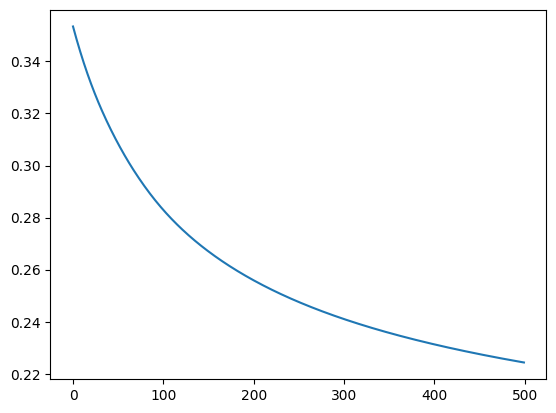

In [60]:
plt.plot(errors)

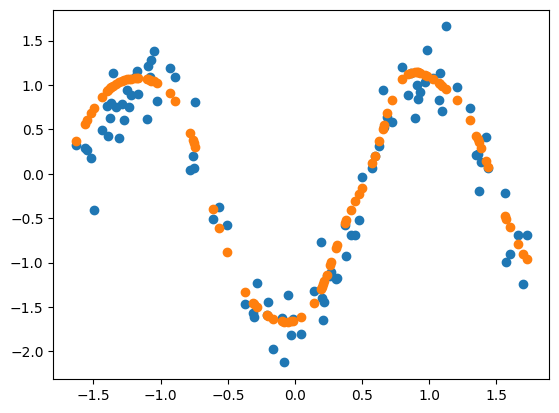

In [15]:
# evaluate model and plot the predictions

y_pred = []
for test in X_test:
    test = np.append(test, 1).reshape(2, 1)
    y_pred.append(model.forward(test))
y_pred = np.array(y_pred)

import matplotlib.pyplot as plt

plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred)
plt.show()

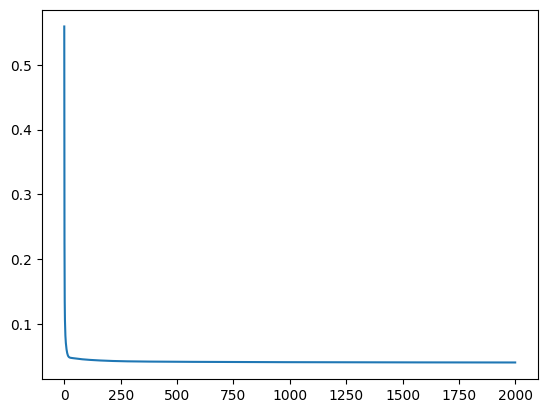

In [16]:
plt.plot(errors)
plt.show()